# Ten Coefficient FIR Filter to Notch Out 100Hz to 200Hz
The sample rate is $1 kHz$.  The number of filter points was to be ten.  Find the FIR filter coefficients.

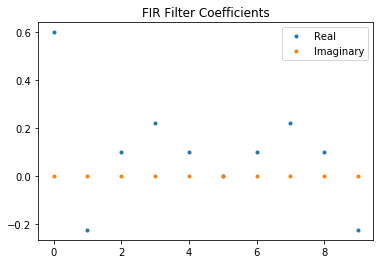

In [42]:
import numpy as np
import matplotlib.pyplot as plt

T = 1/1000
X = [1,0,0,1,1,1,1,1,0,0] # as worked out in class....
x = np.fft.ifft(X)
plt.plot(np.real(x), '.')
plt.plot(np.imag(x), '.')
plt.legend(['Real', 'Imaginary'])
plt.title('FIR Filter Coefficients');

Notice that this in not dying off in time.  This is because this is a noncausal filter.  The response before $t=0$ corresponds to the last half of the coefficients, so you need to time shift the filter response by $NT/2$ to make it a causal filter.  This can be done with the np.fft.fftshift function.

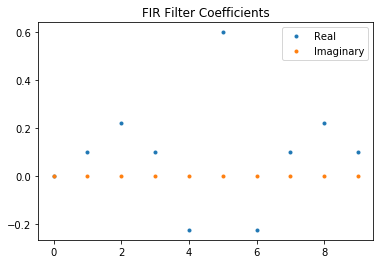

In [43]:
x_delay = np.fft.fftshift(x)
plt.plot(np.real(x_delay), '.')
plt.plot(np.imag(x_delay), '.')
plt.legend(['Real', 'Imaginary'])
plt.title('FIR Filter Coefficients');


It would be nice to see what the frequency response would look like if you didn't do this time shift, vs if you did.  To do that we zero fill after the FIR coefficients so we get a better look in the frequency domain of what the real frequency response is.

In [44]:
x_zf = np.concatenate((x, np.zeros(100)),0)
x_delay_zf = np.concatenate((x_delay, np.zeros(100)),0)
X_zf = np.fft.fft(x_zf)
X_delay_zf = np.fft.fft(x_delay_zf)

Now we need to flip the negative frequencies back where they belong for plots in frequency.

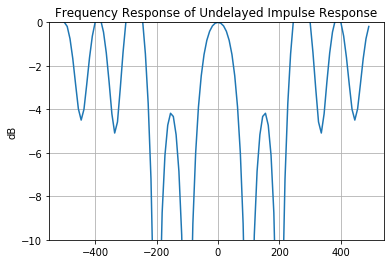

In [50]:
X_flip_zf = np.fft.fftshift(X_zf)
X_flip_delay_zf = np.fft.fftshift(X_delay_zf)
N = X_flip_zf.size
n = np.arange(-N/2, N/2)
f = n/N/T
plt.ylim(-10, 0)
plt.grid()
plt.plot(f, 20*np.log10(np.abs(X_flip_zf)))
plt.ylabel('dB')
plt.title('Frequency Response of Undelayed Impulse Response');


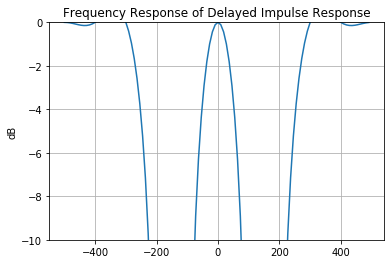

In [49]:
plt.ylim(-10, 0)
plt.plot(f, 20*np.log10(np.abs(X_flip_delay_zf)))
plt.ylabel('dB')
plt.grid()
plt.title('Frequency Response of Delayed Impulse Response');

Notice the improved frequency response in the delayed signal.